In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
import numpy as np

In [5]:
def load_img(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    img = img.astype('float32') # original is uint16
    img = (img - img.min())/(img.max() - img.min())*255.0 # scale image to [0, 255]
    img = img.astype('uint8')
    return img

def show_img(img, mask=None):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
#     plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='bone')
    
    if mask is not None:
        # plt.imshow(np.ma.masked_where(mask!=1, mask), alpha=0.5, cmap='autumn')
        plt.imshow(mask, alpha=0.5)
        handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
        labels = [ "Large Bowel", "Small Bowel", "Stomach"]
        plt.legend(handles,labels)
    plt.axis('off')

[0 1]


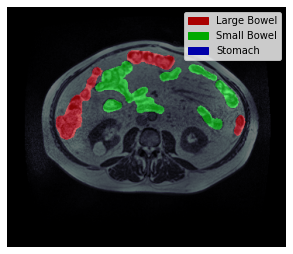

In [6]:
i=112
img_name_list = os.listdir('/home/zhangzr/mmsegmentation_kaggle/data/kaggle_segmentation_data/image')
img = load_img(os.path.join('/home/zhangzr/mmsegmentation_kaggle/data/kaggle_segmentation_data/image',img_name_list[i]))
mask_path = os.path.join('/home/zhangzr/mmsegmentation_kaggle/data/kaggle_segmentation_data/label_3channel_convert', img_name_list[i])
mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
print(np.unique(mask))
plt.figure(figsize=(5,5))
mask[mask==1]=255
show_img(img, mask=mask)

[0. 1.]
(320, 384, 3)


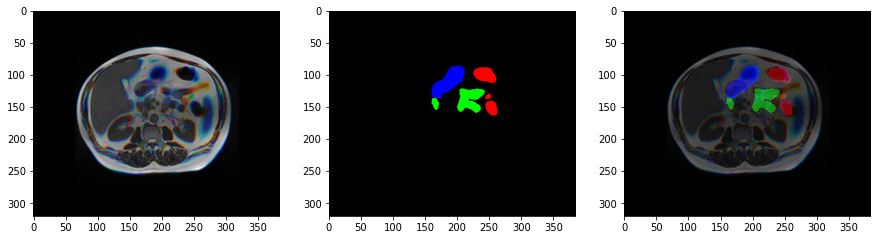

In [5]:
# check 2.5d data
IMAGE_DIR = '../data/2_5d_seg_data/images'
MASK_DIR = '../data/2_5d_seg_data/masks'
plt.figure(figsize=(15, 5))

imgs = np.load(f'{IMAGE_DIR}/case123_day0_slice_0080.npy').astype('float32')
imgs/=imgs.max(axis=(0,1))

plt.subplot(1, 3, 1)
plt.imshow(imgs)

msk = np.load(f'{MASK_DIR}/case123_day0_slice_0080.npy').astype('float32')
msk/=255.0

plt.subplot(1, 3, 2)
plt.imshow(msk)


plt.subplot(1, 3, 3)
plt.imshow(imgs)
plt.imshow(msk, alpha=0.5)